In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
file_path = r"C:\Users\mrall\Desktop\data anlayst\digital_wallet_transactions.csv"
df = pd.read_csv(file_path)

df.head()

,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
0,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,8/19/2023,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban
1,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,8/19/2023,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban
2,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,8/19/2023,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban
3,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,8/19/2023,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban
4,76418260-c985-4011-979d-0914604d0d68,USER_03544,8/19/2023,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      5000 non-null   object 
 1   user_id             5000 non-null   object 
 2   transaction_date    5000 non-null   object 
 3   product_category    5000 non-null   object 
 4   product_name        5000 non-null   object 
 5   merchant_name       5000 non-null   object 
 6   product_amount      5000 non-null   float64
 7   transaction_fee     5000 non-null   float64
 8   cashback            5000 non-null   float64
 9   loyalty_points      5000 non-null   int64  
 10  payment_method      5000 non-null   object 
 11  transaction_status  5000 non-null   object 
 12  merchant_id         5000 non-null   object 
 13  device_type         5000 non-null   object 
 14  location            5000 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 586.1

In [4]:
# basic statistics of data 
df.describe(include='all')

,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location
count,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000,5000,5000
unique,5000,3932,366,20,100,97,NaN,NaN,NaN,NaN,5,3,987,3,3
top,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05939,9/23/2023,Streaming Service,Python Programming Course,Airbnb,NaN,NaN,NaN,NaN,Bank Transfer,Successful,MERCH_0376,Android,Urban
freq,1,4,27,299,80,106,NaN,NaN,NaN,NaN,1045,4755,14,2995,3485
mean,NaN,NaN,NaN,NaN,NaN,NaN,4957.502722,25.188874,50.658782,498.790400,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2885.034160,14.535298,28.522467,288.962434,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,10.090000,0.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2453.977500,12.665000,26.495000,246.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4943.685000,25.070000,51.390000,504.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,7444.815000,37.947500,75.067500,749.000000,NaN,NaN,NaN,NaN,NaN


In [5]:
df['transaction_status'].value_counts()

transaction_status
Successful    4755
Failed         146
Pending         99
Name: count, dtype: int64

In [6]:
# checking for missing values 
missing_values = df.isnull().sum()

In [7]:


# Encoding categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, columns=[
    'product_category', 'product_name', 'merchant_name', 
    'payment_method', 'device_type', 'location'
], drop_first=True)





In [8]:
# Convert 'transaction_status' to a binary label: 'Successful' = 1, others = 0
df_encoded['transaction_status'] = df_encoded['transaction_status'].apply(lambda x: 1 if x == 'Successful' else 0)



In [9]:
# Separate the features (X) and the target variable (y)
X = df_encoded.drop(['cashback', 'transaction_id', 'user_id', 'transaction_date', 'merchant_id'], axis=1)
y = df_encoded['cashback']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras import layers

# Building the model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])



c:\Users\mrall\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3290.1677 - mean_absolute_error: 49.7022 - val_loss: 3187.1038 - val_mean_absolute_error: 48.8621
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3377.4167 - mean_absolute_error: 50.4947 - val_loss: 3187.1038 - val_mean_absolute_error: 48.8621
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3319.6719 - mean_absolute_error: 49.9990 - val_loss: 3187.1038 - val_mean_absolute_error: 48.8621
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3251.7283 - mean_absolute_error: 49.4037 - val_loss: 3187.1038 - val_mean_absolute_error: 48.8621
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3352.7888 - mean_absolute_error: 50.2610 - val_loss: 3187.1038 - val_mean_absolute_error: 48.8621
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3314.5291 - mean_absolute_error: 50.1492 - val_loss: 3187.1038 - val_mean_absolute_error: 48.8621
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/ste

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 3266.6660 - mean_absolute_error: 49.5611
Test Loss: 3187.103759765625, Test Accuracy: 48.862125396728516


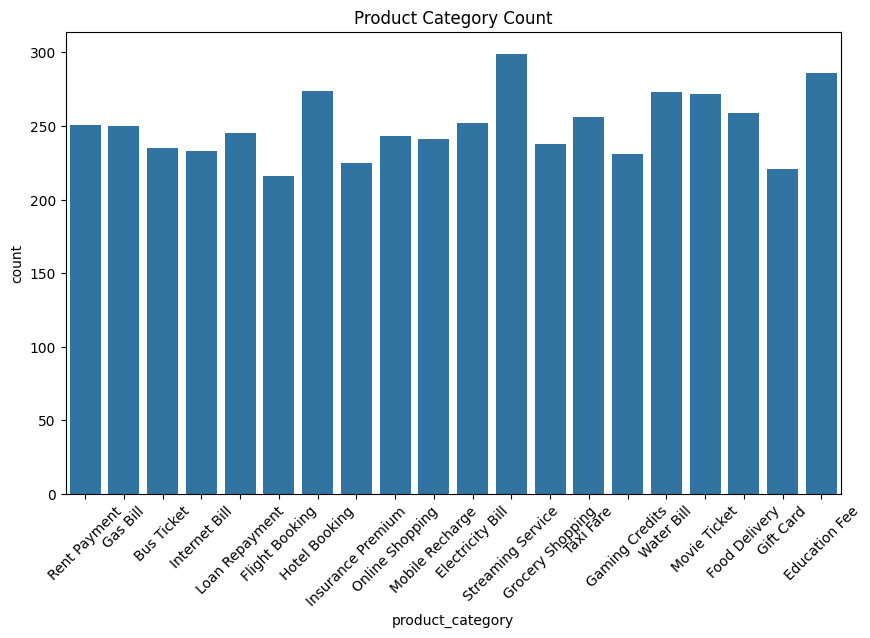

In [15]:
# Generate visualizations
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product_category')
plt.title('Product Category Count')
plt.xticks(rotation=45)
plt.show()

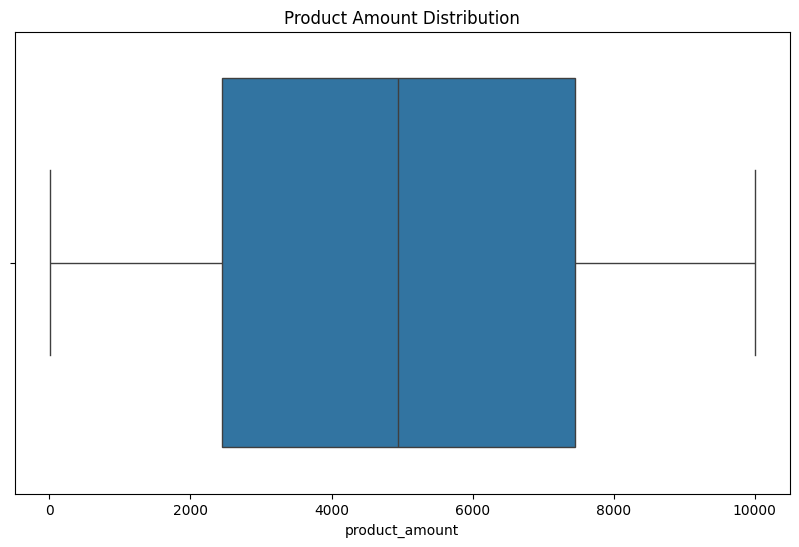

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='product_amount')
plt.title('Product Amount Distribution')
plt.show()

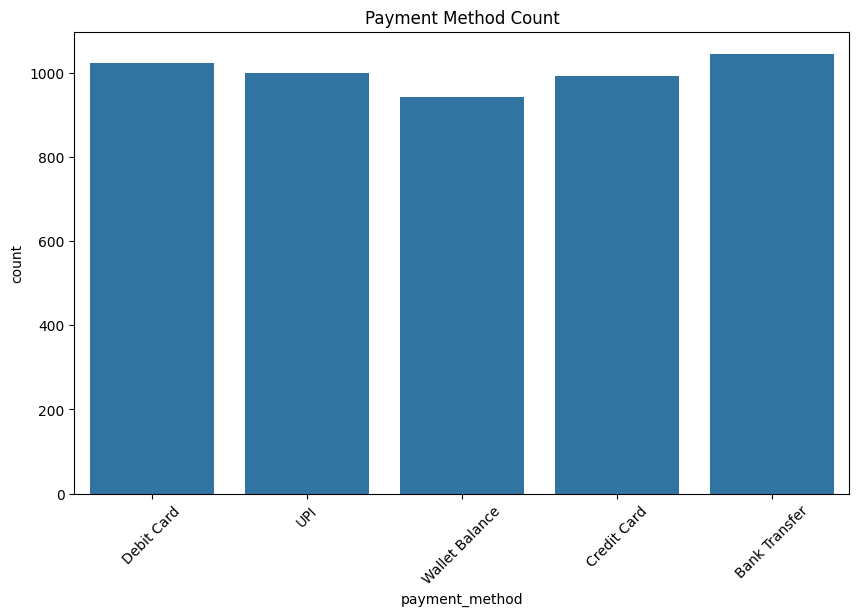

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='payment_method')
plt.title('Payment Method Count')
plt.xticks(rotation=45)
plt.show()